# Santos Buoy - Quality Control Analysis

## Import libs

In [48]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [32]:
data_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'
os.chdir(data_path)

In [33]:
# Data
buoys_df_raw = pd.read_csv('pnboia_raw_data.csv',parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.rename(columns={'humi':'rh', # variables temporarily renamed to match QCChecks limits naming
                            'dewp':'dewpt',
                            'wtmp':'sst',
                            'cvel1':'cspd1',
                            'cvel2':'cspd2',
                            'cvel3':'cspd3',
                            'wvht':'swvht',
                            'wmax':'mxwvht',
                            'dpd':'tp',
                            'mwd':'wvdir',
                            'spred':'wvspread',
                            'arad':'srad'}, inplace=True)
buoys_df_raw.drop(columns=['lat','lon'],inplace=True)

names = {'cf':'cabofrio',
        'cf2':'cabofrio2',
        'fo':'fortaleza',
        'it':'itajai_0',
        'ni':'niteroi',
        'po':'porto_seguro', 
        're':'recife',
        'rg':'rio_grande', 
        'sa':'santos', 
        'vi':'vitoria'}


buoys_df_raw['buoy'] = buoys_df_raw['buoy'].replace(names)
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# Limits from pnboia_limits_tests.py
santos_lims = pnboia_limits_tests.santos

# santos data
santos_raw = buoys_df_raw.loc['santos']

## Previous Filtering

- Check range limits for "srad"

In [4]:
# filter data with
santos = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    range_check_climate=False,
                    t_continuity_check=False)

santos = santos.where(santos['srad'] > -1000)

mis_value_check done.
range_check done.


## Statistical Analysis

In [44]:
no_outliers = ['pres','wspd2', 'swvht', 'wvspread']
few_outliers = ['gust2', 'atmp', 'rh', 'dewpt', 'sst', 'cspd1', 'mxwvht']
many_outliers = ['wspd1', 'gust1', 'srad']

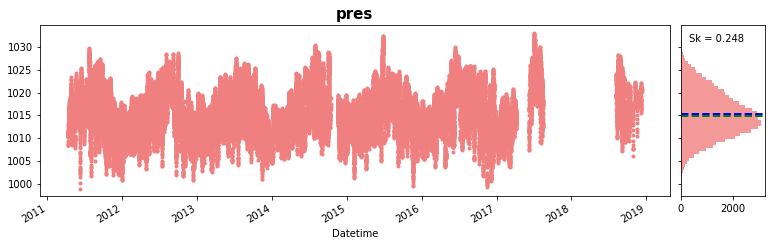

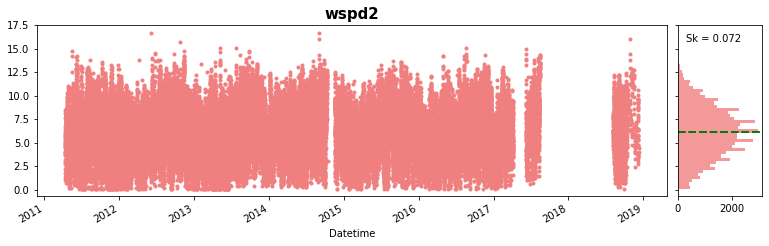

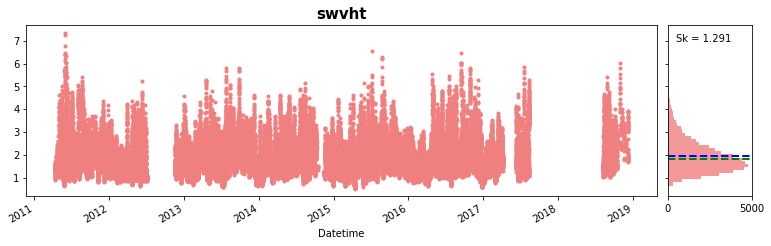

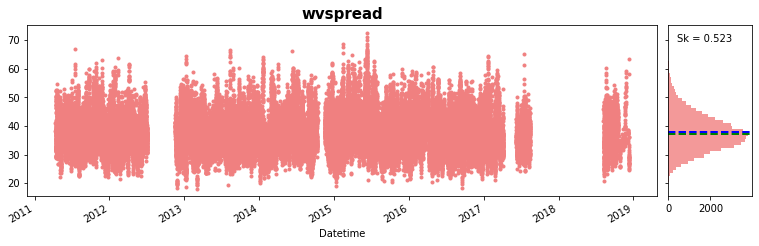

In [74]:
# NO OUTLIERS
for param in no_outliers:
    plot_hist(santos,param)

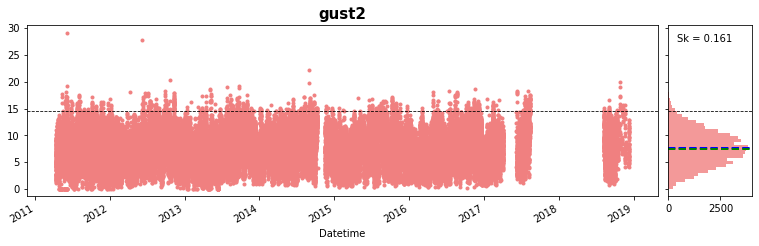

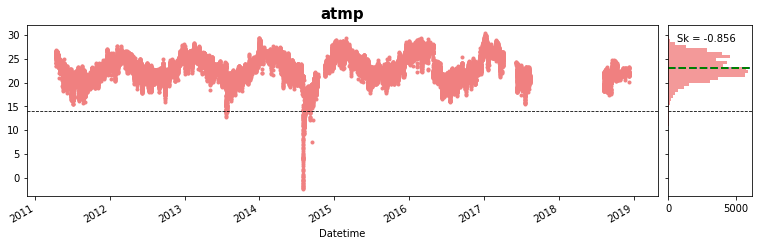

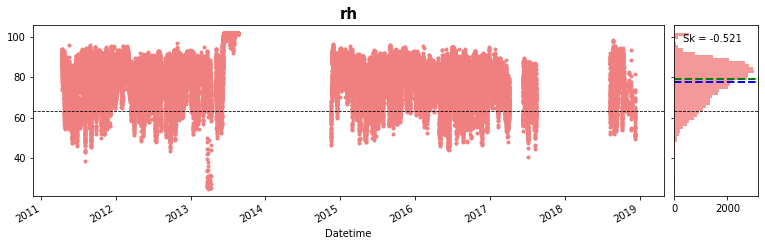

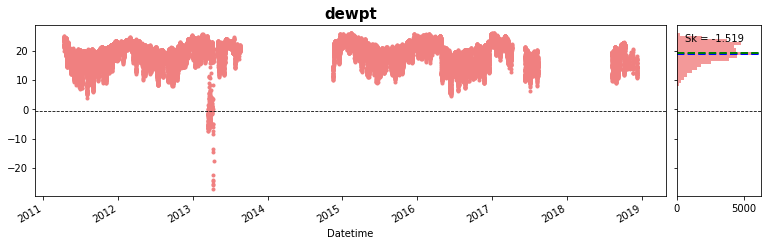

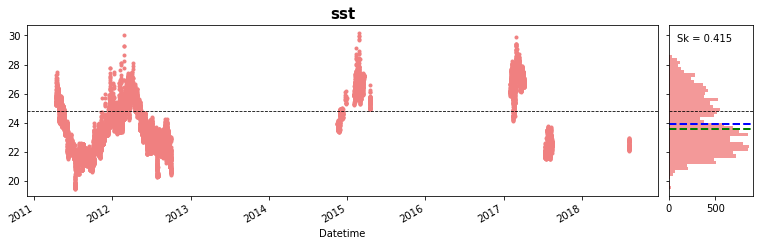

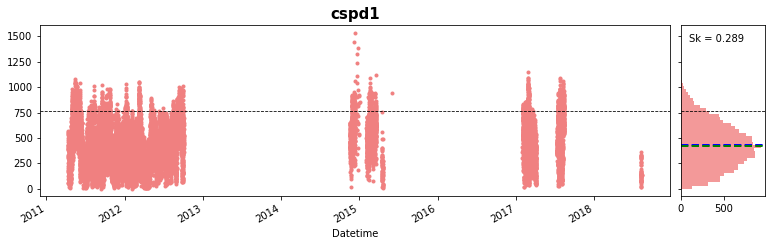

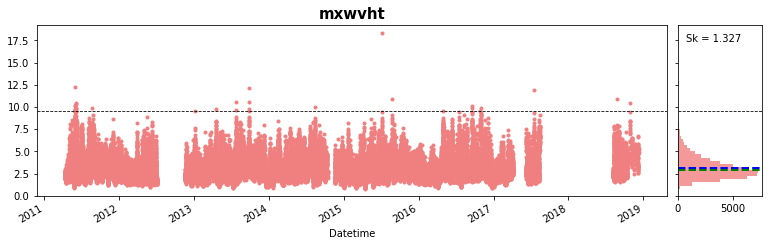

In [63]:
# FEW OUTLIERS
for param in few_outliers:
    plot_hist(santos,param)

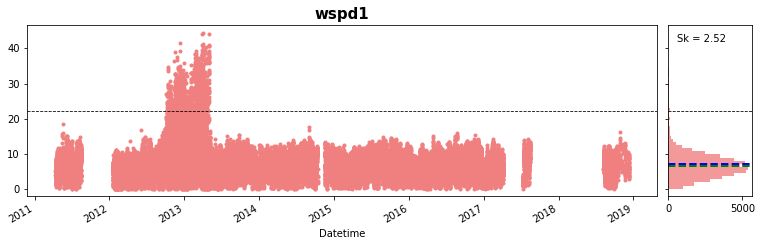

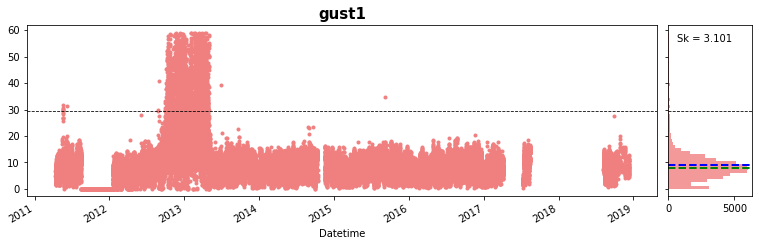

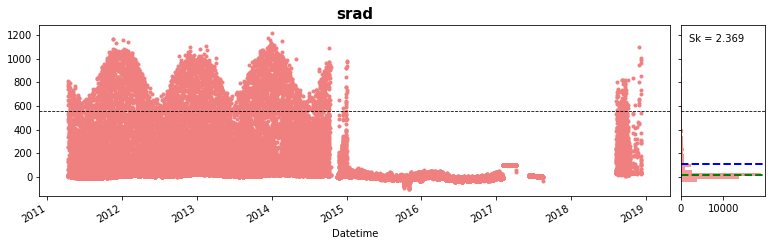

In [64]:
# MANY OUTLIERS
for param in many_outliers:
    plot_hist(santos,param)

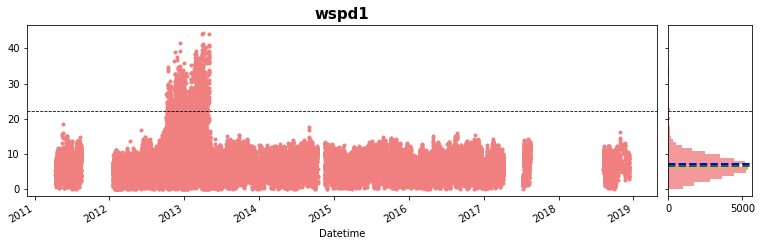

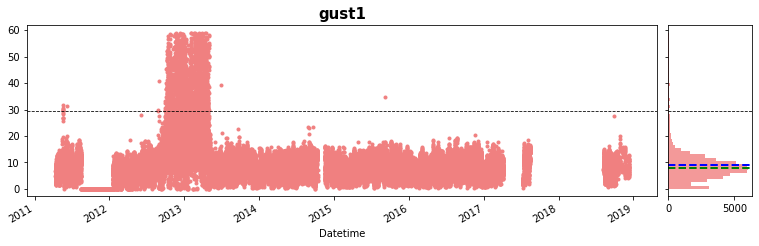

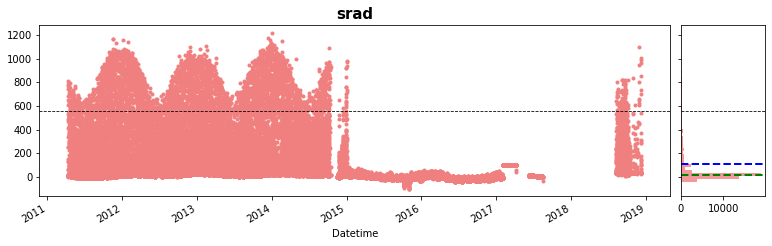

In [18]:
# MANY OUTLIERS
for param in many_outliers:
    plot_hist(santos,param)

## Lim generation

In [105]:
# Generated lims
santos_out_lims_df_1 = gen_outlier_lim(santos,buoy_name='santos',std_factor=3)

# Generate lims dict
santos_out_lims_dict_1 = manual_outlier_lims('santos',santos_out_lims_df_1)

# filter data with
santos1 = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    range_check_climate_limits=santos_out_lims_dict_1)

range_check_climate done.


In [106]:
# Generated lims
santos_out_lims_df_2 = gen_outlier_lim(buoys_df_raw,std_factor=5).loc['santos']

# Generate lims dict
santos_out_lims_dict_2 = manual_outlier_lims('santos',santos_out_lims_df_2)

# filter data with
santos2 = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    range_check_climate_limits=santos_out_lims_dict_2)

range_check_climate done.


In [12]:
santos_out_lims_df_1

,mean,std,lower_lim,upper_lim
param,,,,
wspd1,6.972614,4.393892,0.000000,20.154291
gust1,9.176288,7.814154,0.000000,32.618752
wdir1,162.488490,90.237982,0.000000,433.202438
wspd2,6.092304,2.686544,0.000000,14.151936
gust2,7.593132,3.170931,0.000000,17.105925
wdir2,141.400892,92.560152,0.000000,419.081349
atmp,23.088022,2.607952,15.264165,30.911878
rh,77.656242,10.170745,47.144006,108.168477
dewpt,18.950263,3.873184,7.330711,30.569814


In [77]:
santos_out_lims_df_2

,mean,std,lower_lim,upper_lim
param,,,,
wspd1,6.401711,4.475001,0.000000,28.776718
gust1,9.017142,8.317955,0.000000,50.606919
wdir1,159.850767,89.586655,0.000000,607.784040
wspd2,6.039737,2.686925,0.000000,19.474364
gust2,7.546736,3.147744,0.000000,23.285455
wdir2,140.969248,94.856431,0.000000,615.251404
atmp,23.233748,2.588944,10.289027,36.178470
rh,77.815642,10.951423,23.058527,132.572757
dewpt,19.209717,3.889881,0.000000,38.659124


# CHECKPOINT ----------------

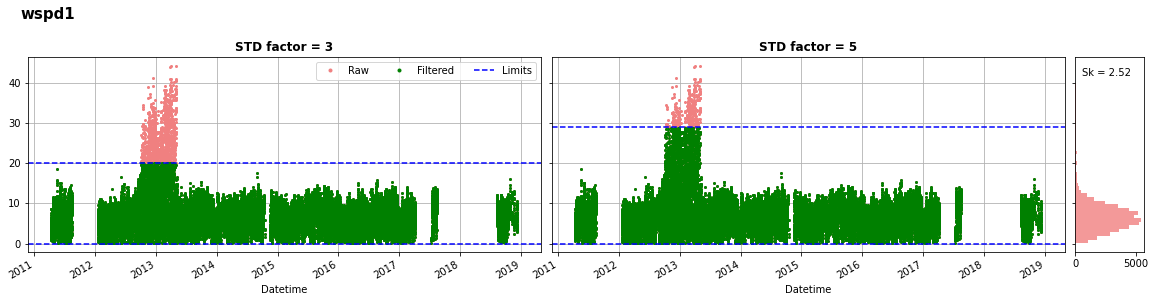

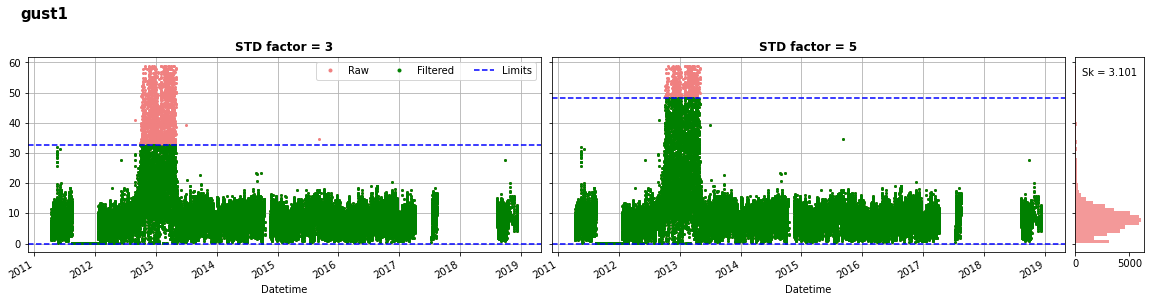

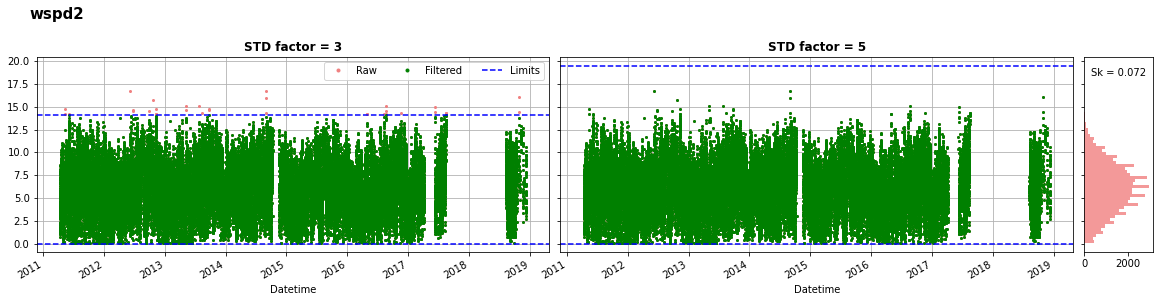

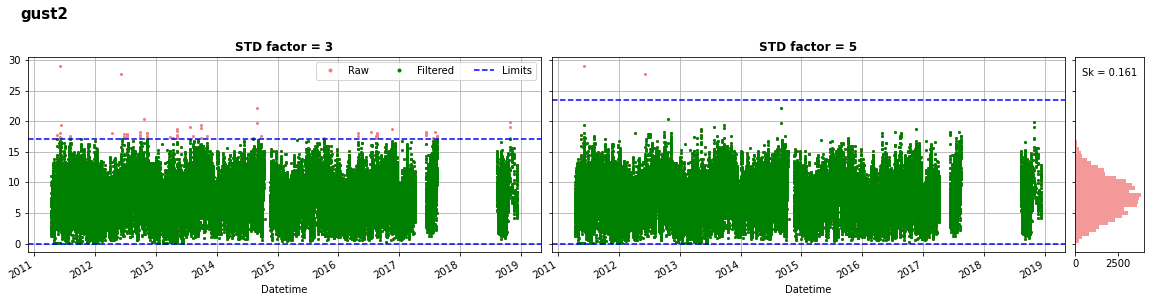

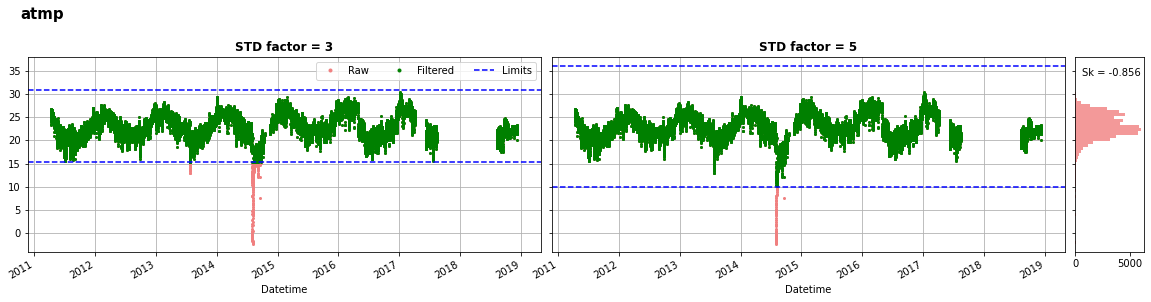

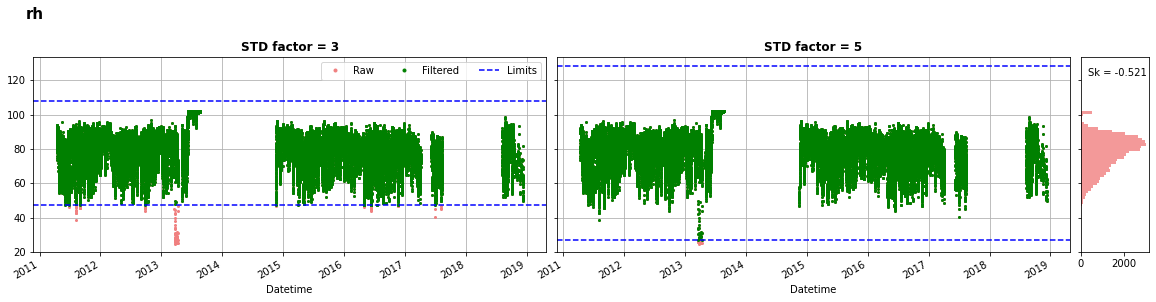

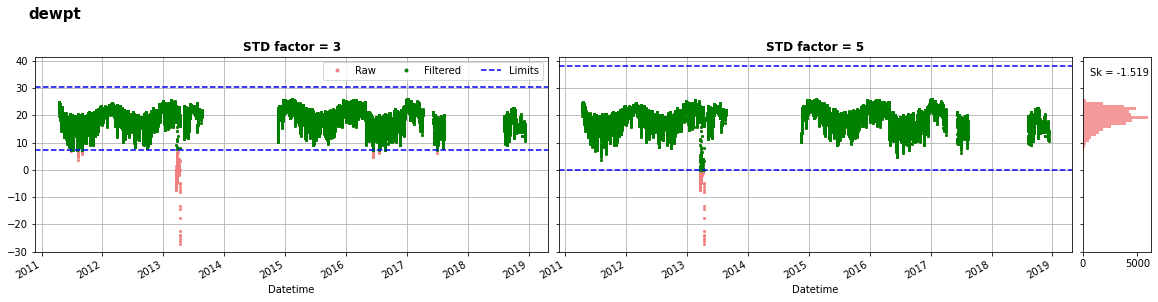

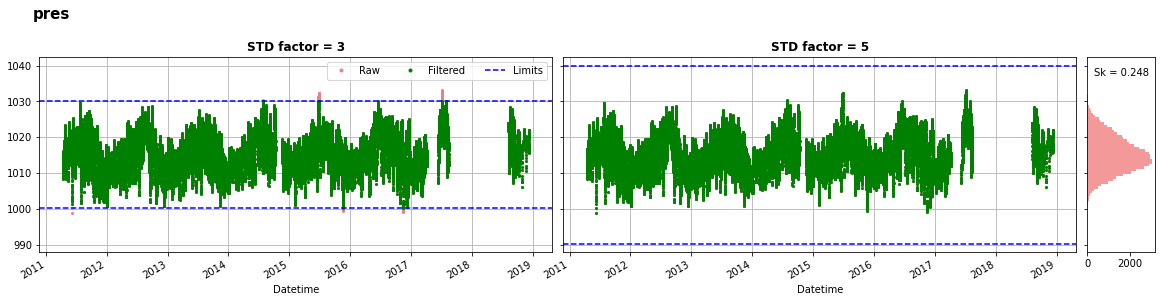

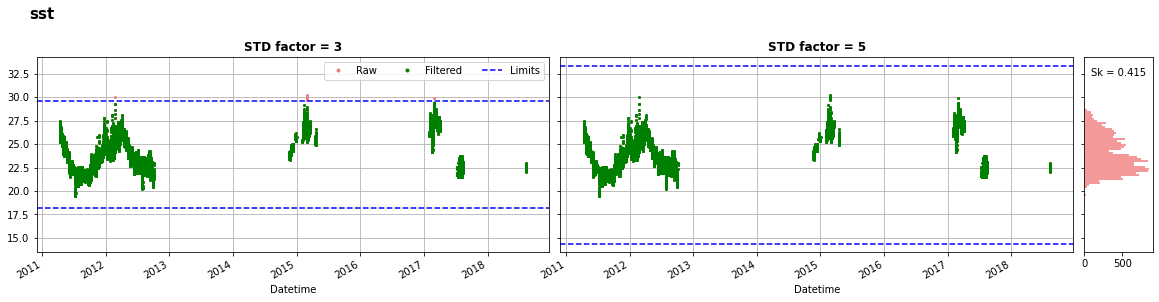

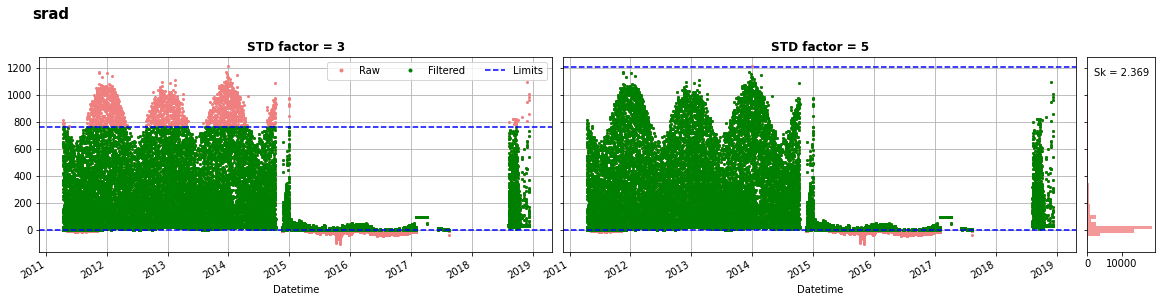

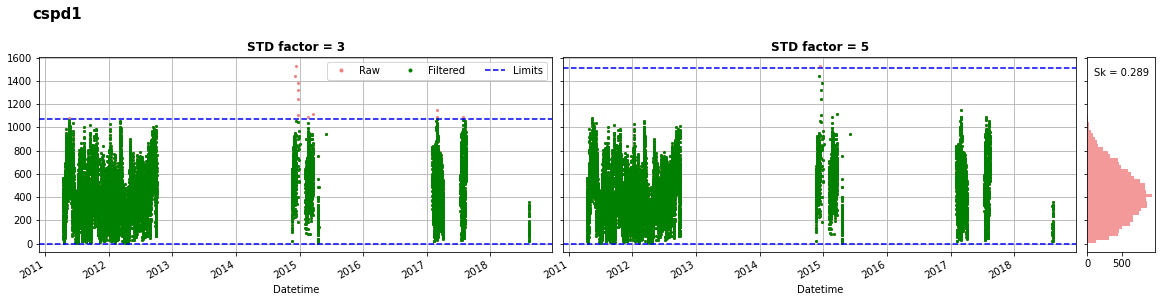

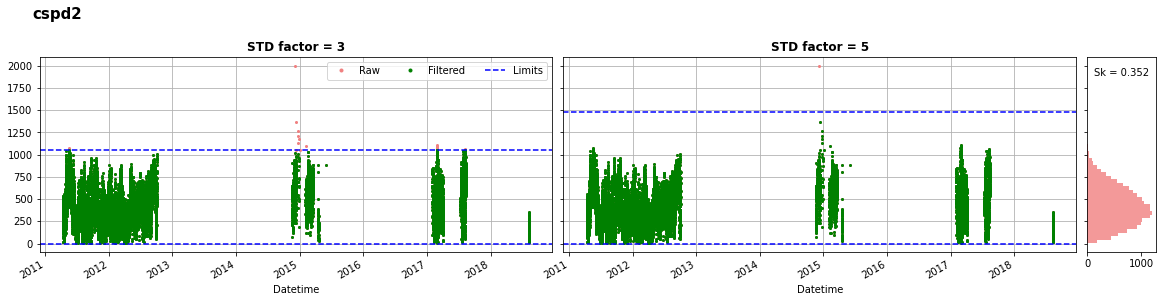

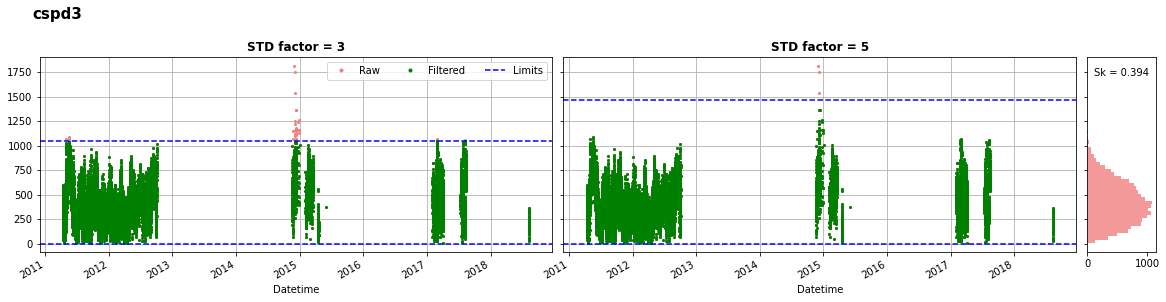

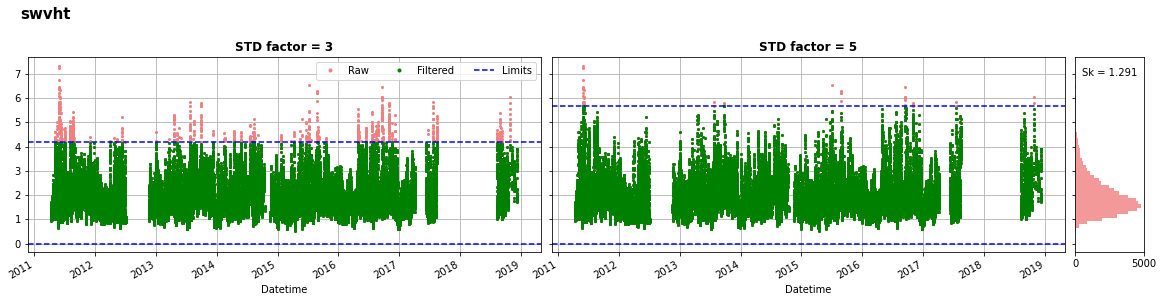

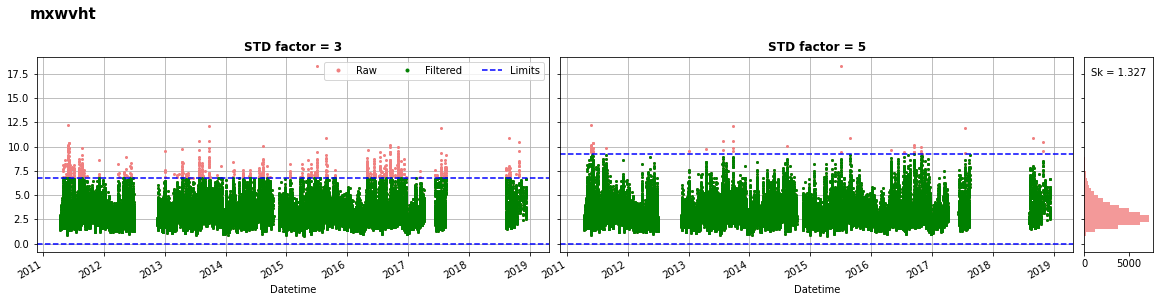

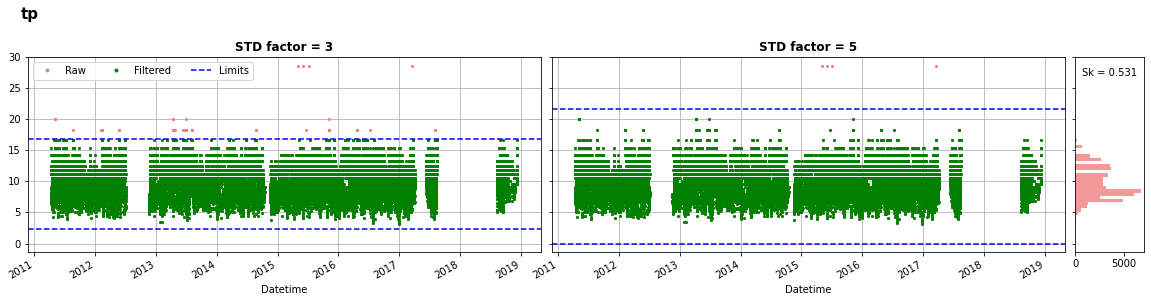

In [83]:
santos_notdir = santos.drop(columns=santos.filter(regex='dir|head|spread').columns)
parameters = santos_notdir.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=santos,
                    limits=santos_lims,
                    buoy='santos',
                    parameter=param)
    plt.show()

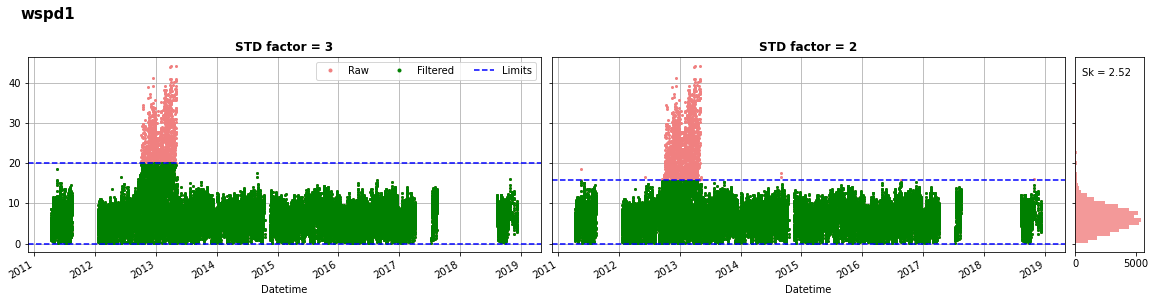

In [84]:
param = 'wspd1'
plot_comparison(factor1=3, 
                    factor2=2, 
                    data=santos,
                    limits=santos_lims,
                    buoy='santos',
                    parameter=param)
plt.show()

In [85]:
santos_out_lims_dict_2

{'wspd1': [0.0, 28.77671801011438],
 'gust1': [0.0, 50.60691883814458],
 'wdir1': [0.0, 607.7840404557512],
 'wspd2': [0.0, 19.474363580678638],
 'gust2': [0.0, 23.2854545309318],
 'wdir2': [0.0, 615.2514043596891],
 'atmp': [10.289027435590151, 36.17846953492284],
 'rh': [23.05852734722184, 132.57275721919785],
 'dewpt': [0.0, 38.65912429105818],
 'pres': [990.2977848970345, 1039.8442522989599],
 'sst': [14.450423851613502, 34.166169221575444],
 'bhead': [0.0, 597.1261280470158],
 'srad': [0.0, 347834.74486498424],
 'cspd1': [0.0, 1474.8058870821465],
 'cdir1': [0.0, 463.929774107612],
 'cspd2': [0.0, 1513.477461875554],
 'cdir2': [0.0, 458.09453169700237],
 'cspd3': [0.0, 1510.7128490813188],
 'cdir3': [0.0, 455.623798130301],
 'swvht': [0.0, 5.638818943769981],
 'mxwvht': [0.0, 9.13628830241745],
 'tp': [0.0, 21.53293570642159],
 'wvdir': [0.0, 370.9737027201585],
 'wvspread': [5.775731328720042, 69.78316892430016]}

## Cabofrio filtering with Santos limits

In [93]:
# cabofrio data
cabofrio_raw = buoys_df_raw.loc['cabofrio']

# Limits from pnboia_limits_tests.py
cabofrio_lims = pnboia_limits_tests.cabofrio

# filter data with
cabofrio = filter_data(data=buoys_df_raw,
                    buoy='cabofrio',
                    limits=cabofrio_lims,
                    mis_value_check=True,
                    range_check=True,
                    range_check_climate=False,
                    t_continuity_check=False)

mis_value_check done.
range_check done.


In [104]:
# Generated lims
cabofrio_out_lims_df_1 = gen_outlier_lim(cabofrio_raw,buoy_name='cabofrio',std_factor=3)

# Generate lims dict
cabofrio_out_lims_dict_1 = manual_outlier_lims('cabofrio',cabofrio_out_lims_df_1)

# filter data with
cabofrio1 = filter_data(data=buoys_df_raw,
                    buoy='cabofrio',
                    limits=cabofrio_lims,
                    mis_value_check=True,
                    range_check=True,
                    t_continuity_check=False,
                    range_check_climate_limits=santos_out_lims_dict_2)

mis_value_check done.
range_check done.
range_check_climate done.


In [99]:
cabofrio_out_lims_df_1

,mean,std,lower_lim,upper_lim
param,,,,
wspd1,4.363873,3.172773,0.000000,13.882192
gust1,4.981330,3.592320,0.000000,15.758290
wdir1,149.094216,90.907115,0.000000,421.815560
atmp,21.189707,8.099843,0.000000,45.489236
rh,80.609537,37.170415,0.000000,192.120782
dewpt,17.094976,17.117607,0.000000,68.447797
pres,1006.469023,45.912379,868.731886,1144.206160
sst,22.582836,5.649252,5.635079,39.530592
bhead,188.179894,95.824438,0.000000,475.653207


In [100]:
santos_out_lims_dict_2

{'wspd1': [0.0, 28.77671801011438],
 'gust1': [0.0, 50.60691883814458],
 'wdir1': [0.0, 607.7840404557512],
 'wspd2': [0.0, 19.474363580678638],
 'gust2': [0.0, 23.2854545309318],
 'wdir2': [0.0, 615.2514043596891],
 'atmp': [10.289027435590151, 36.17846953492284],
 'rh': [23.05852734722184, 132.57275721919785],
 'dewpt': [0.0, 38.65912429105818],
 'pres': [990.2977848970345, 1039.8442522989599],
 'sst': [14.450423851613502, 34.166169221575444],
 'bhead': [0.0, 597.1261280470158],
 'srad': [0.0, 347834.74486498424],
 'cspd1': [0.0, 1474.8058870821465],
 'cdir1': [0.0, 463.929774107612],
 'cspd2': [0.0, 1513.477461875554],
 'cdir2': [0.0, 458.09453169700237],
 'cspd3': [0.0, 1510.7128490813188],
 'cdir3': [0.0, 455.623798130301],
 'swvht': [0.0, 5.638818943769981],
 'mxwvht': [0.0, 9.13628830241745],
 'tp': [0.0, 21.53293570642159],
 'wvdir': [0.0, 370.9737027201585],
 'wvspread': [5.775731328720042, 69.78316892430016]}

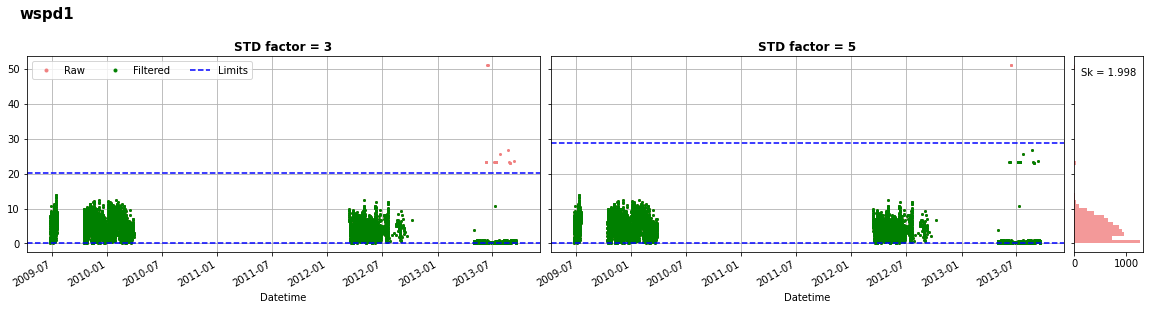

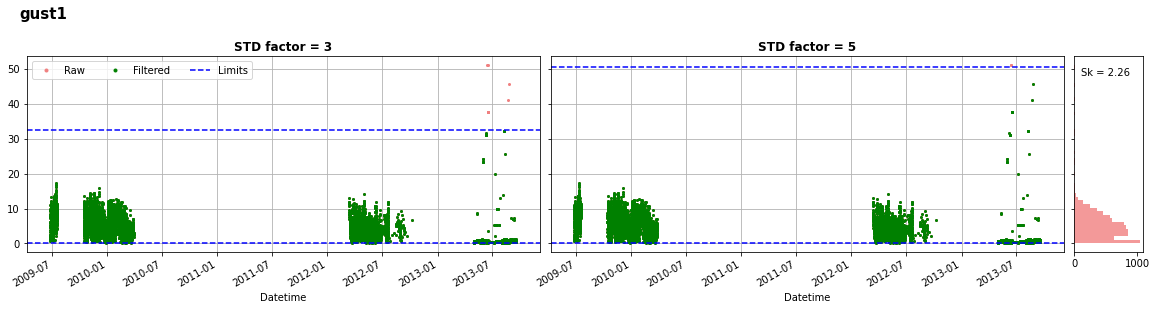

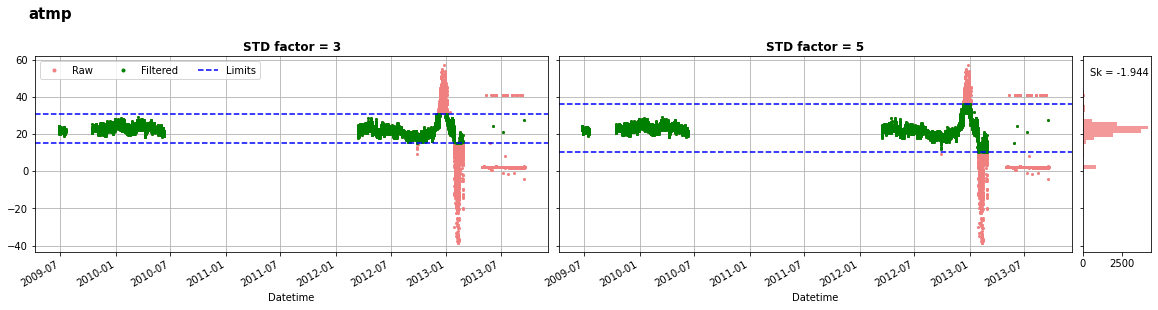

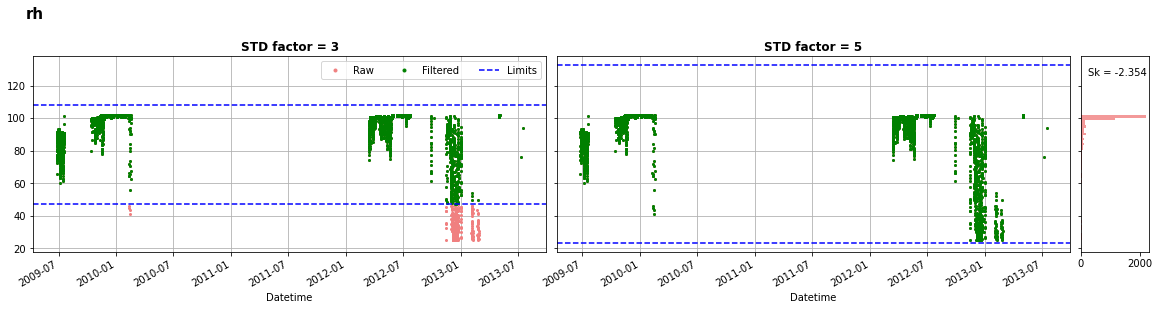

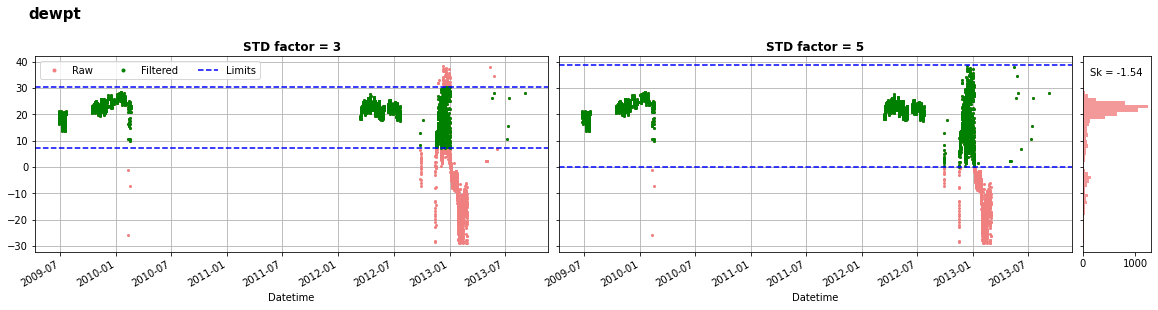

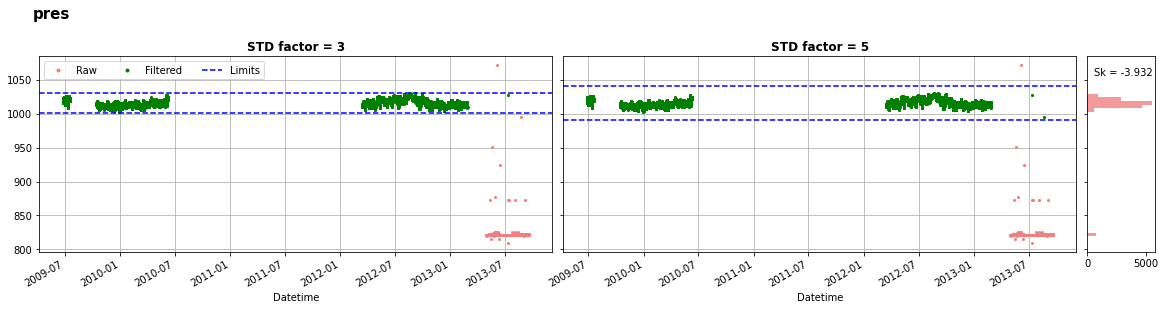

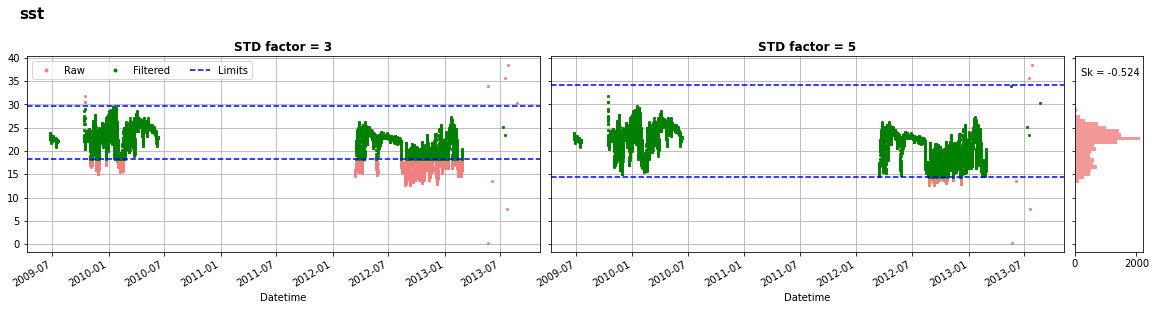

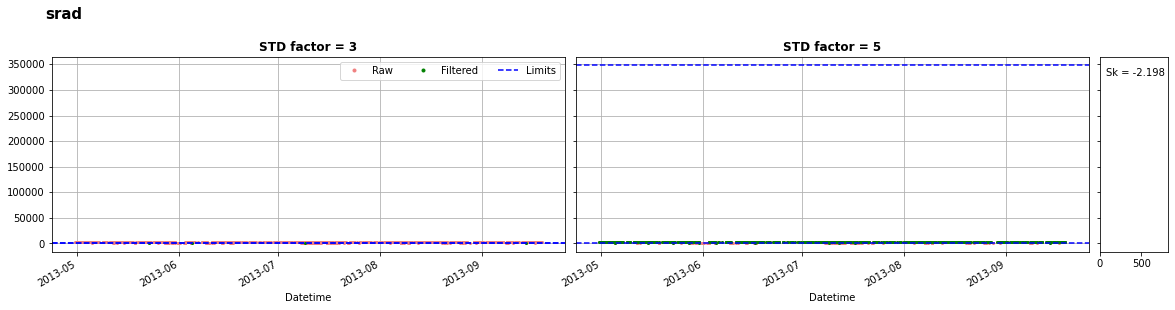

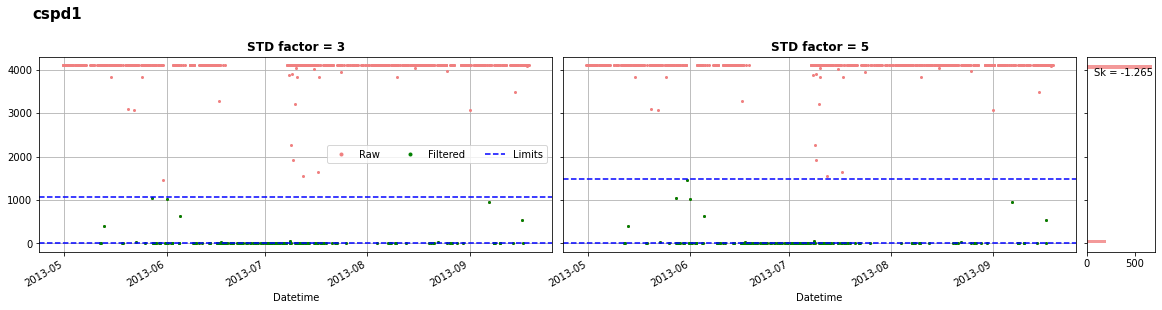

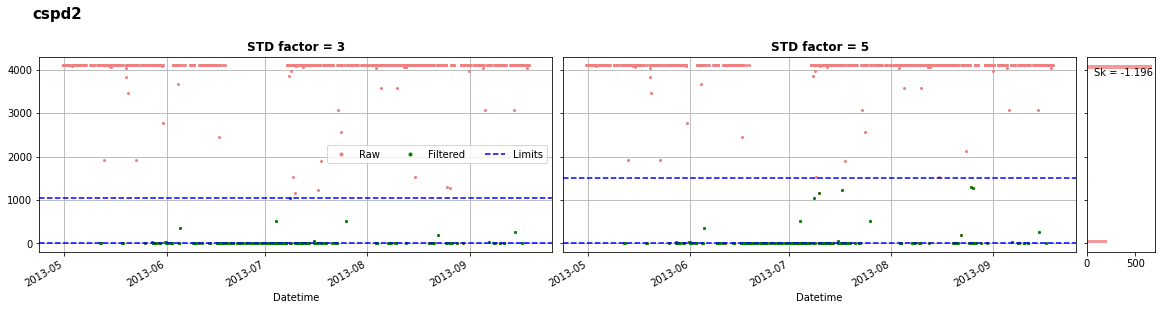

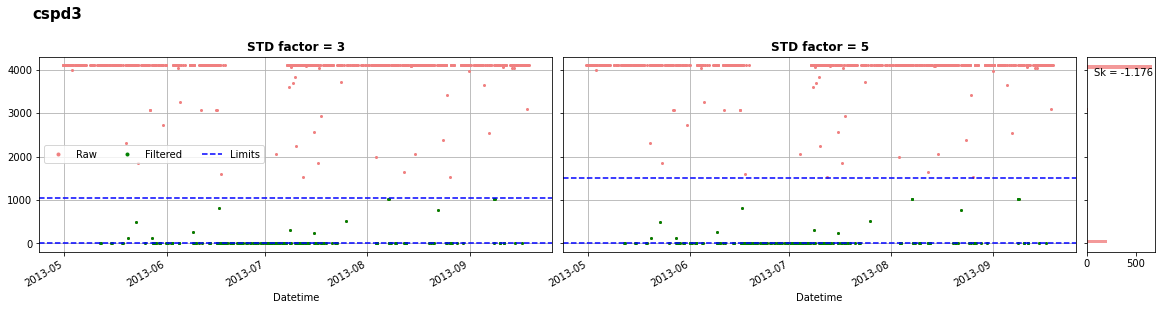

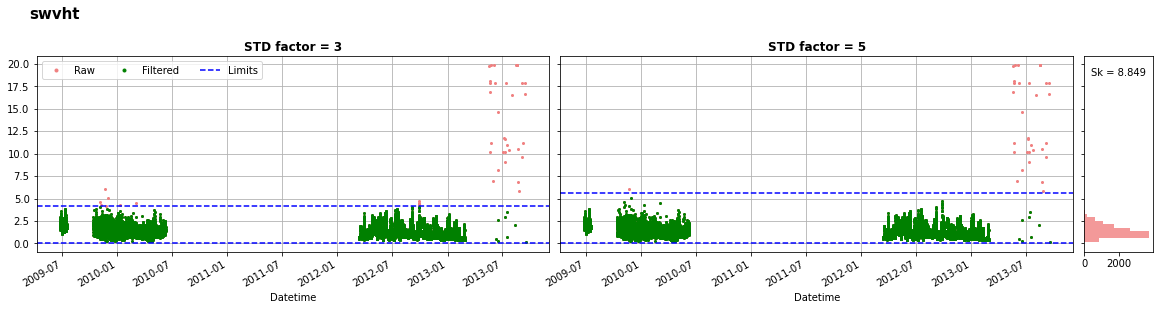

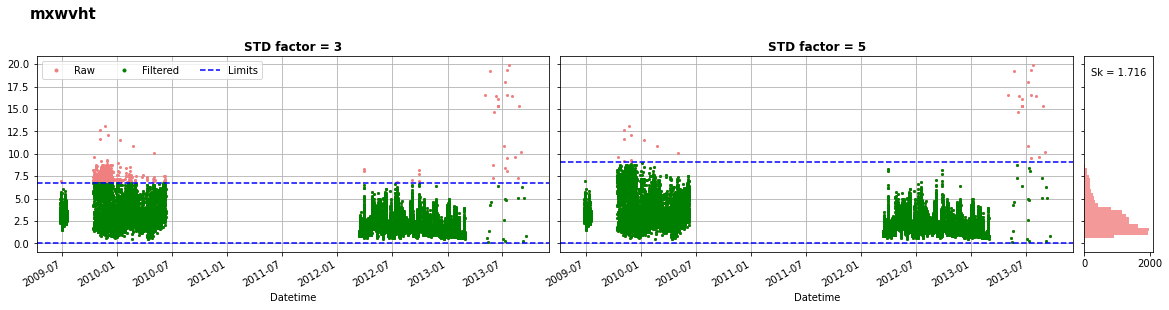

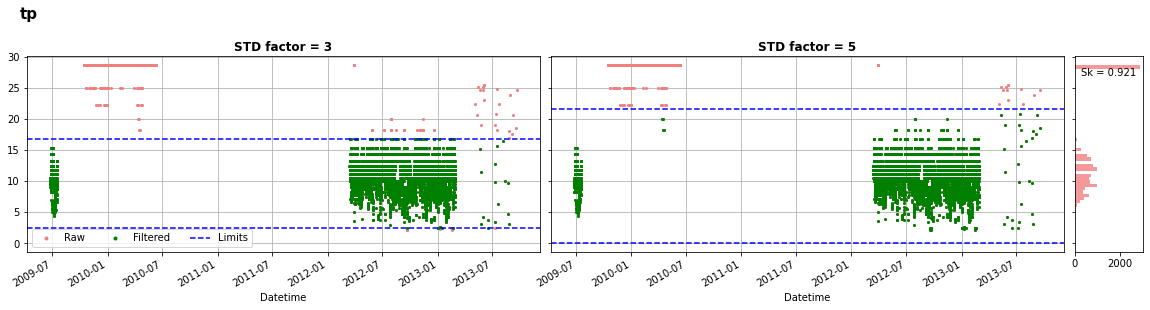

In [114]:
cabofrio_notdir = cabofrio.drop(columns=cabofrio.filter(regex='dir|head|spread').columns)
cabofrio_notdir = cabofrio_notdir.drop(columns=['wspd2','gust2'])
parameters = cabofrio_notdir.columns[1:]

manual_limits = [santos_out_lims_dict_1, santos_out_lims_dict_2]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=cabofrio,
                    limits=cabofrio_lims,
                    manual_limits=manual_limits,
                    buoy='cabofrio',
                    parameter=param)
    plt.show()